# Data exploration

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)

In [2]:
train_data = pd.read_csv('../data/train.csv')
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv('../data/test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [4]:
train_grouped = train_data.groupby('label')
train_grouped.size()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

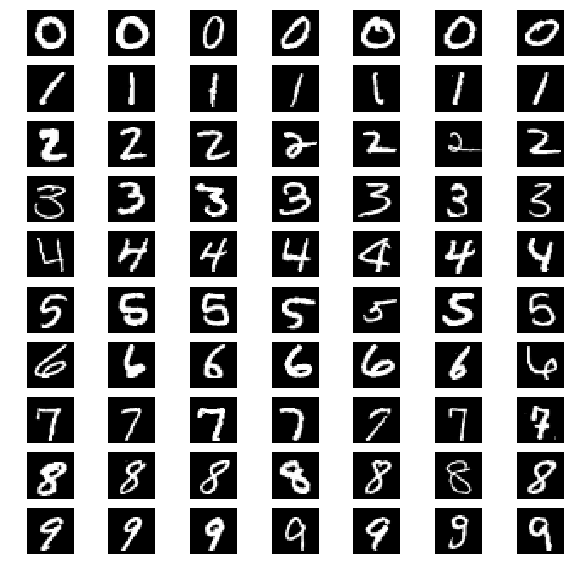

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

%matplotlib inline

num_labels = 10
num_images_per_group = 7

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(num_labels, num_images_per_group)

for label in range(num_labels):
    for i, row in enumerate(train_grouped.get_group(label).head(num_images_per_group).values):
        img_data = row[1:].astype('uint8').reshape((28, 28))
        ax = plt.subplot(gs[label, i])
        ax.imshow(img_data, cmap='gray')
        ax.axis('off')

# Convolutional Neural Network (CNN)

In [6]:
import tensorflow as tf

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

## Network structure

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

## Network evaluation

In [8]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Data preparation

In [9]:
import numpy as np
shuffled_train_data = train_data.sample(frac=1)

In [10]:
cnn_train_data = shuffled_train_data.iloc[:33600, :].as_matrix()
batch_start = 0

def next_train_batch(batch_size):
    global batch_start
    batch = (cnn_train_data[batch_start : batch_start + batch_size, 1:].astype('float32'),
             np.eye(10)[cnn_train_data[batch_start : batch_start + batch_size, 0]])
    batch_start += batch_size
    if batch_start >= cnn_train_data.shape[0]:
        batch_start = 0
    return batch

In [11]:
cnn_eval_data = shuffled_train_data.iloc[33600:, :].as_matrix()
cnn_eval_x = cnn_eval_data[:, 1:].astype('float32')
cnn_eval_y_ = np.eye(10)[cnn_eval_data[:, 0]]

In [12]:
cnn_test_x = test_data.as_matrix().astype('float32')

## Training and evaluation

In [13]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = next_train_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(
                feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('evaluation accuracy %g'
          % accuracy.eval(
              feed_dict={x: cnn_eval_x, y_: cnn_eval_y_, keep_prob: 1.0}))

    save_path = saver.save(sess, 'models/cnn.ckpt')
    print('Model saved in file: %s' % save_path)

step 0, training accuracy 0.12
step 100, training accuracy 0.8
step 200, training accuracy 0.9
step 300, training accuracy 0.78
step 400, training accuracy 0.92
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.88
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
step 1100, training accuracy 0.94
step 1200, training accuracy 0.96
step 1300, training accuracy 0.94
step 1400, training accuracy 0.94
step 1500, training accuracy 0.92
step 1600, training accuracy 1
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 0.92
step 2000, training accuracy 0.94
step 2100, training accuracy 1
step 2200, training accuracy 0.86
step 2300, training accuracy 0.94
step 2400, training accuracy 0.96
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 1
step 3000

## Prediction

In [14]:
with tf.Session() as sess:
    saver.restore(sess, 'models/cnn.ckpt')
    print('Model restored.')

    prediction = tf.argmax(y_conv, 1)
    classified = sess.run(prediction,
                          feed_dict={x: cnn_test_x, keep_prob: 1.0})

    output = pd.DataFrame({'Label' : pd.Series(classified)})
    output.index += 1
    output.index.name = 'ImageId'
    output.to_csv('outputs/cnn.txt')
    print('Output predictions were saved.')

INFO:tensorflow:Restoring parameters from models/cnn.ckpt
Model restored.
Output predictions were saved.
